In [ ]:
import pandas as pd

url = 'https://drive.google.com/file/d/1wwuTtqbNsIIN2wHz8UioTKH2P8vIsON_/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)
df.head()

,time,isSunday,Min Delay,Bound_E,Bound_N,Bound_S,Bound_W,Location_Loop,Location_On_Route,Location_Station,...,Line_504,Line_505,Line_506,Line_509,Line_510,Line_511,Line_512,temperature,rain,snow
0,02:00,0,30,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,4.2,0.2,2.8
1,02:00,0,10,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,4.2,0.2,2.8
2,03:00,0,16,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,4.1,0.2,2.8
3,03:00,0,18,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,4.1,0.2,2.8
4,04:00,0,10,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,4.5,0.2,2.8


In [ ]:
# Dropping date
df.columns

Index(['time', 'isSunday', 'Min Delay', 'Bound_E', 'Bound_N', 'Bound_S',
       'Bound_W', 'Location_Loop', 'Location_On_Route', 'Location_Station',
       'Incident_Cleaning - Unsanitary', 'Incident_Collision - TTC Involved',
       'Incident_Diversion', 'Incident_Emergency Services',
       'Incident_General Delay', 'Incident_Held By', 'Incident_Investigation',
       'Incident_Late Entering Service', 'Incident_Mechanical',
       'Incident_Operations', 'Incident_Overhead', 'Incident_Rail/Switches',
       'Incident_Security', 'Incident_Utilized Off Route', 'Line_501',
       'Line_503', 'Line_504', 'Line_505', 'Line_506', 'Line_509', 'Line_510',
       'Line_511', 'Line_512', 'temperature', 'rain', 'snow'],
      dtype='object')

In [ ]:
# Convert time to just the hour part
df['time'] = df['time'].apply(lambda x: int(x.split(':')[0]))
df = pd.get_dummies(df, columns=['time'])

In [ ]:
dict_variance = dict()

variance_column1 = df['Min Delay'].var()

print(f"The variance of Min Delay is: {variance_column1}")

dict_variance['benchmark'] = variance_column1

The variance of Min Delay is: 1154.5582368046544


# Building Models

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Min Delay']),
                                                     df['Min Delay'],
                                                     test_size = 0.25,
                                                     shuffle = False
                                                     )

In [ ]:
len(X_train)

16146

In [ ]:
len(X_test)

5382

In [ ]:
len(y_train)

16146

In [ ]:
len(y_test)

5382

In [ ]:
X_train.head()

,isSunday,Bound_E,Bound_N,Bound_S,Bound_W,Location_Loop,Location_On_Route,Location_Station,Incident_Cleaning - Unsanitary,Incident_Collision - TTC Involved,...,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21,time_22,time_23
0,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
len(X_train)

16146

In [ ]:
y_train.head()

0    30
1    10
2    16
3    18
4    10
Name: Min Delay, dtype: int64

## Baseline

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
from sklearn.feature_selection import f_regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

def make_models():
  """Makes a dictionary of four untrained models"""

  return {
      'LR': LinearRegression(),
      'CART': DecisionTreeRegressor(),
      'RF': RandomForestRegressor()
  }

In [ ]:
'''Create a data frame to keep track of all the models we train in this lab'''

# Initialize a tuple of names for each model
model_names = ('LR',
               'CART',
               'RF' ,
               'NN'
               )
# Initialize a tuple of technique names that we will cover
engineering_techniques = ('Baseline',  # Set of baseline models
                          'Scaling Standarizarion',
                          'Feature Engineering',  # Set of models trained with engineered features
                          'Feature_Selection',  # Set of models trained with "selected" features
                          'Grid Search',  # Set of models trained via grid search
                          # 'Stacking',  # Set of stacked model
                          # 'Bagging'  # A bagged model
                          )

# Initialize the multi indices of the `all_models` data frame
df_indices = pd.MultiIndex.from_product([model_names, engineering_techniques], names=('model names', 'technique'))
# Initialize the `all_models` data frame
all_models = pd.DataFrame(index=df_indices, columns=['RMSE', 'MAE', 'R2', 'Model'])
all_models[['RMSE', 'MAE', 'R2']] = all_models[['RMSE', 'MAE', 'R2']].astype(float)
all_models  # Initialized data frame only has NaNs, which is perfect!

RMSE  MAE  R2 Model
model names technique                                  
LR          Baseline                 NaN  NaN NaN   NaN
            Scaling Standarizarion   NaN  NaN NaN   NaN
            Feature Engineering      NaN  NaN NaN   NaN
            Feature_Selection        NaN  NaN NaN   NaN
            Grid Search              NaN  NaN NaN   NaN
CART        Baseline                 NaN  NaN NaN   NaN
            Scaling Standarizarion   NaN  NaN NaN   NaN
            Feature Engineering      NaN  NaN NaN   NaN
            Feature_Selection        NaN  NaN NaN   NaN
            Grid Search              NaN  NaN NaN   NaN
RF          Baseline                 NaN  NaN NaN   NaN
            Scaling Standarizarion   NaN  NaN NaN   NaN
            Feature Engineering      NaN  NaN NaN   NaN
            Feature_Selection        NaN  NaN NaN   NaN
            Grid Search              NaN  NaN NaN   NaN
NN          Baseline                 NaN  NaN NaN   NaN
            Scaling Standarizarion   NaN  NaN NaN   NaN
            Feature Engineering      NaN  NaN NaN   NaN
            Feature_Selection        NaN  NaN NaN   NaN
            Grid Search              NaN  NaN NaN   NaN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Assuming your dataframes are pandas dataframes, converting them to numpy arrays
X_train_np = X_train.values.astype('float32')
y_train_np = y_train.values.astype('float32')
X_test_np = X_test.values.astype('float32')
y_test_np = y_test.values.astype('float32')

input_dim = X_train_np.shape[1]  # Number of features

model = Sequential()
model.add(Dense(50, input_dim=input_dim, activation='relu'))  # Layer with 50 neurons and ReLU activation
model.add(Dense(30, activation='relu'))  # Another layer with 30 neurons
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(X_train_np, y_train_np, epochs=200, batch_size=32, validation_data=(X_test_np, y_test_np))


Epoch 1/200
505/505 [==============================] - 3s 3ms/step - loss: 860.6407 - mae: 10.0050 - val_loss: 1981.3135 - val_mae: 12.2601
Epoch 2/200
505/505 [==============================] - 1s 2ms/step - loss: 781.9274 - mae: 9.3165 - val_loss: 1907.8174 - val_mae: 12.1937
Epoch 3/200
505/505 [==============================] - 1s 2ms/step - loss: 757.1003 - mae: 9.0506 - val_loss: 1878.2590 - val_mae: 13.4611
Epoch 4/200
505/505 [==============================] - 1s 2ms/step - loss: 749.0646 - mae: 9.0114 - val_loss: 1866.4214 - val_mae: 13.5887
Epoch 5/200
505/505 [==============================] - 1s 2ms/step - loss: 744.3720 - mae: 8.9915 - val_loss: 1855.2688 - val_mae: 12.2460
Epoch 6/200
505/505 [==============================] - 1s 2ms/step - loss: 741.2596 - mae: 8.8679 - val_loss: 1866.6467 - val_mae: 11.7553
Epoch 7/200
505/505 [==============================] - 1s 2ms/step - loss: 738.7316 - mae: 8.9884 - val_loss: 1866.3218 - val_mae: 11.7577
Epoch 8/200
505/505 [=====

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predicting the Test set results
y_pred_nn = model.predict(X_test_np)
print("y_pred_nn ", y_pred_nn)

# Evaluate the model
mse = mean_squared_error(y_test_np, y_pred_nn)
mae = mean_absolute_error(y_test_np, y_pred_nn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_np, y_pred_nn)

print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)
print('R^2:', r2)


169/169 [==============================] - 0s 1ms/step
y_pred_nn  [[14.694462 ]
 [13.605553 ]
 [ 2.2266634]
 ...
 [ 3.2120016]
 [ 7.4824653]
 [12.045773 ]]
MSE: 2149.272
MAE: 13.192287
RMSE: 46.36024
R^2: -0.04827087123583307


In [ ]:
# # Add NN values
all_models.loc[('NN', 'Baseline'), :] = [rmse, mae, r2, Sequential()]

### Pred VS Actual

In [ ]:
# import matplotlib.pyplot as plt

# # Create a scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.5)
# plt.scatter(range(len(y_pred_nn)), y_pred_nn, color='red', label='Predicted', alpha=0.5)

# # Adding labels and title
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.title('Actual vs Predicted Values for NN ')
# plt.legend()

# # Show the plota
# plt.show()

In [ ]:
# # Create a scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred_nn, color='blue', label='Actual', alpha=0.5)
# #plt.scatter(range(len(lr_predictions)), lr_predictions, color='red', label='Predicted', alpha=0.5)

# # Adding labels and title
# plt.xlabel('True')
# plt.ylabel('Predicted')
# plt.title('Actual vs Predicted Values for NN ')
# plt.legend()
# x=[0,250]
# y=[0,250]
# plt.plot(x,y)
# # Show the plot
# plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score

def fit_and_score_model(all_models, stage_name, X_train, X_out_of_sample, y_train, y_out_of_sample):
    """Fits the models that are initialized by models_dict on the X_train and y_train
    data, and evaluates the model on the out-of-sample data X_out_of_sample and y_out_of_sample"""

    # Make a dictionary of models
    models_dict = make_models()
    y_pred = dict()
    M = dict()

    # Loop through each model in model_dict
    for model_name in models_dict:
        model = models_dict[model_name]

        model.fit(X_train, y_train)

        y_pred[model_name] = model.predict(X_out_of_sample)
        M[model_name] = model

        # Evaluate using regression metrics
        model_rmse = np.sqrt(mean_squared_error(y_out_of_sample, model.predict(X_out_of_sample)))
        model_mae = mean_absolute_error(y_out_of_sample, model.predict(X_out_of_sample))
        model_r2 = r2_score(y_out_of_sample, model.predict(X_out_of_sample))

        print(f"{model_name} achieved RMSE: {model_rmse:.3f}, MAE: {model_mae:.3f}, R²: {model_r2:.3f}")

        all_models.loc[(model_name, stage_name), :] = [model_rmse, model_mae, model_r2, model]

    return all_models, y_pred, M

all_models, y_pred, M = fit_and_score_model(all_models, 'Baseline', X_train, X_test, y_train, y_test)

all_models

LR achieved RMSE: 43.144, MAE: 12.482, R²: 0.092
CART achieved RMSE: 52.053, MAE: 16.484, R²: -0.322
RF achieved RMSE: 44.743, MAE: 13.463, R²: 0.024


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


RMSE        MAE        R2  \
model names technique                                                
LR          Baseline                43.144200  12.482397  0.092123   
            Scaling Standarizarion        NaN        NaN       NaN   
            Feature Engineering           NaN        NaN       NaN   
            Feature_Selection             NaN        NaN       NaN   
            Grid Search                   NaN        NaN       NaN   
CART        Baseline                52.052975  16.483662 -0.321519   
            Scaling Standarizarion        NaN        NaN       NaN   
            Feature Engineering           NaN        NaN       NaN   
            Feature_Selection             NaN        NaN       NaN   
            Grid Search                   NaN        NaN       NaN   
RF          Baseline                44.742510  13.463458  0.023611   
            Scaling Standarizarion        NaN        NaN       NaN   
            Feature Engineering           NaN        NaN       NaN   
            Feature_Selection             NaN        NaN       NaN   
            Grid Search                   NaN        NaN       NaN   
NN          Baseline                46.360241  13.192287 -0.048271   
            Scaling Standarizarion        NaN        NaN       NaN   
            Feature Engineering           NaN        NaN       NaN   
            Feature_Selection             NaN        NaN       NaN   
            Grid Search                   NaN        NaN       NaN   

                                                                                Model  
model names technique                                                                  
LR          Baseline                                               LinearRegression()  
            Scaling Standarizarion                                                NaN  
            Feature Engineering                                                   NaN  
            Feature_Selection                                                     NaN  
            Grid Search                                                           NaN  
CART        Baseline                                          DecisionTreeRegressor()  
            Scaling Standarizarion                                                NaN  
            Feature Engineering                                                   NaN  
            Feature_Selection                                                     NaN  
            Grid Search                                                           NaN  
RF          Baseline                (DecisionTreeRegressor(max_features=1.0, rando...  
            Scaling Standarizarion                                                NaN  
            Feature Engineering                                                   NaN  
            Feature_Selection                                                     NaN  
            Grid Search                                                           NaN  
NN          Baseline                <keras.src.engine.sequential.Sequential object...  
            Scaling Standarizarion                                                NaN  
            Feature Engineering                                                   NaN  
            Feature_Selection                                                     NaN  
            Grid Search                                                           NaN

In [ ]:
# LR
feature_names = X_train.columns

# The coefficients are available in `model.coef_`
coefficients = M['LR'].coef_

# If you have an intercept, it's available in `model.intercept_`
intercept = M['LR'].intercept_

# Now, print the feature names with their corresponding coefficients
print("Intercept:", intercept)
for i in range(len(coefficients)):
    print(f"{feature_names[i]}: {coefficients[i]}")

Intercept: -105598113900.79881
isSunday: 1.6963388814848472
Bound_E: -158602502981.60806
Bound_N: -158602502981.8945
Bound_S: -158602502981.85083
Bound_W: -158602502981.56308
Location_Loop: 445586274043.0708
Location_On_Route: 445586274044.60834
Location_Station: 445586274043.29767
Incident_Cleaning - Unsanitary: -267996382027.25906
Incident_Collision - TTC Involved: -267996382013.94968
Incident_Diversion: -267996381981.86954
Incident_Emergency Services: -267996382023.3739
Incident_General Delay: -267996382022.41583
Incident_Held By: -267996382011.01166
Incident_Investigation: -267996382018.18942
Incident_Late Entering Service: -267996382027.79907
Incident_Mechanical: -267996382025.77158
Incident_Operations: -267996382026.4356
Incident_Overhead: -267996381990.26297
Incident_Rail/Switches: -267996381988.71265
Incident_Security: -267996382024.06854
Incident_Utilized Off Route: -267996382026.71973
Line_501: 18190830397.91365
Line_503: 18190830399.777817
Line_504: 18190830396.417877
Line_5

In [ ]:
lr_predictions = y_pred['LR']
cart_predictions = y_pred['CART']
rf_predictions = y_pred['RF']
print("lr_predictions " , len(lr_predictions))
print("y_test ", len(y_test))

lr_predictions  5382
y_test  5382


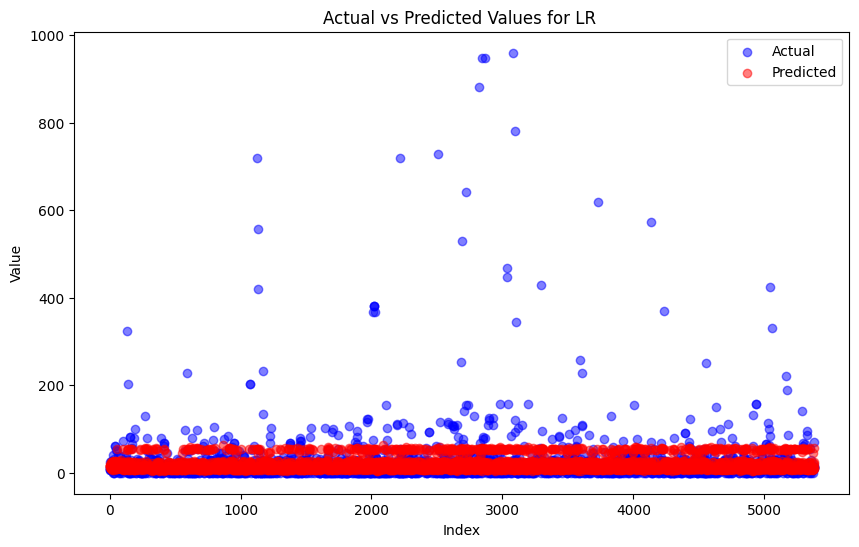

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(range(len(lr_predictions)), lr_predictions, color='red', label='Predicted', alpha=0.5)

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values for LR ')
plt.legend()

# Show the plota
plt.show()

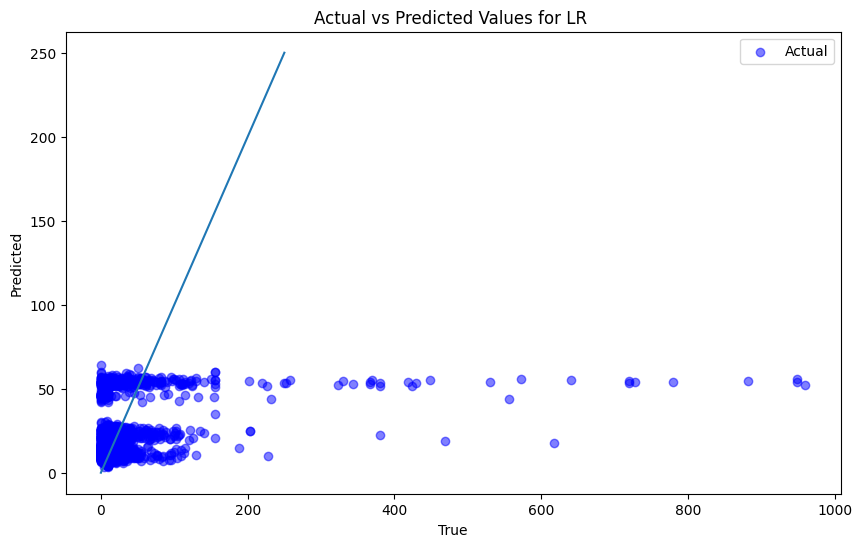

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_predictions, color='blue', label='Actual', alpha=0.5)
#plt.scatter(range(len(lr_predictions)), lr_predictions, color='red', label='Predicted', alpha=0.5)

# Adding labels and title
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values for LR ')
plt.legend()
x=[0,250]
y=[0,250]
plt.plot(x,y)
# Show the plot
plt.show()

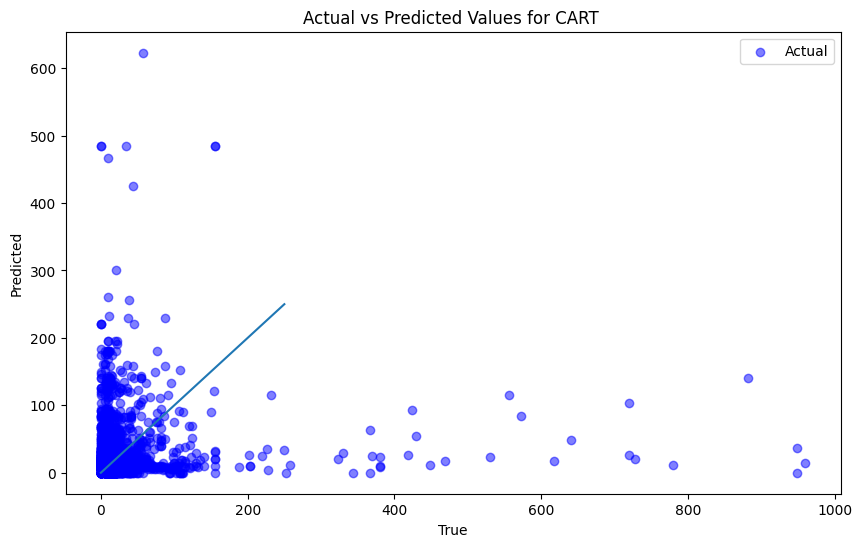

In [ ]:

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, cart_predictions, color='blue', label='Actual', alpha=0.5)
#plt.scatter(range(len(lr_predictions)), lr_predictions, color='red', label='Predicted', alpha=0.5)

# Adding labels and title
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values for CART ')
plt.legend()
x=[0,250]
y=[0,250]
plt.plot(x,y)
# Show the plot
plt.show()

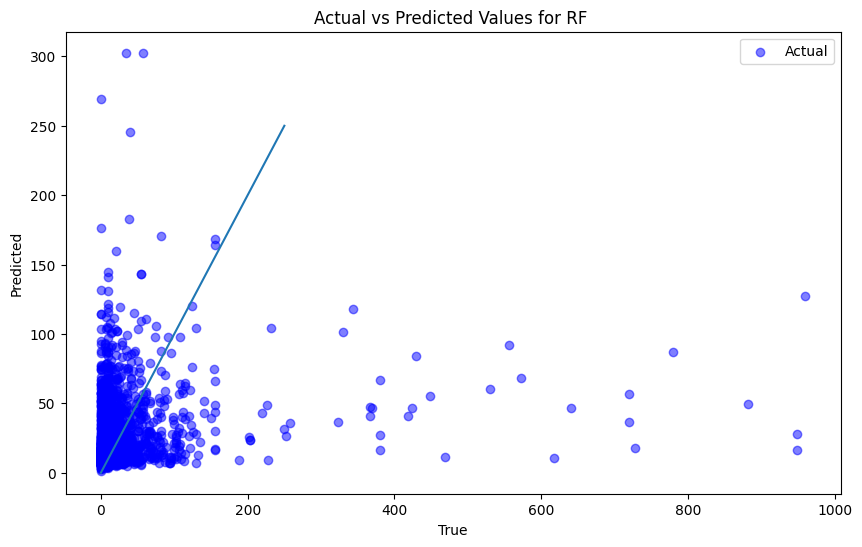

In [ ]:

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, color='blue', label='Actual', alpha=0.5)
#plt.scatter(range(len(lr_predictions)), lr_predictions, color='red', label='Predicted', alpha=0.5)

# Adding labels and title
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values for RF ')
plt.legend()
x=[0,250]
y=[0,250]
plt.plot(x,y)
# Show the plot
plt.show()

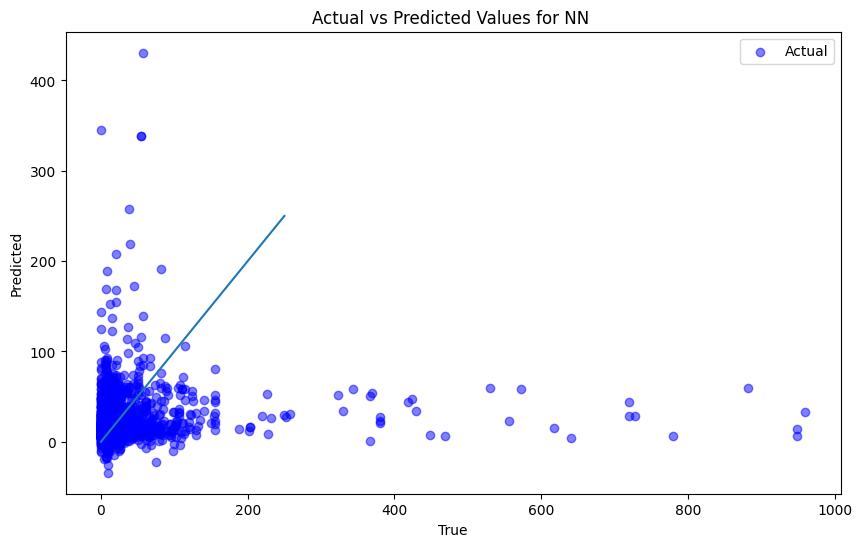

In [ ]:

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, color='blue', label='Actual', alpha=0.5)
#plt.scatter(range(len(lr_predictions)), lr_predictions, color='red', label='Predicted', alpha=0.5)

# Adding labels and title
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values for NN ')
plt.legend()
x=[0,250]
y=[0,250]
plt.plot(x,y)
# Show the plot
plt.show()

## Feature Standarization

In [ ]:
numeric_cols = ['temperature', 'rain', 'snow']
categorical_cols  = ['isSunday', 'Bound_E', 'Bound_N', 'Bound_S', 'Bound_W', 'Location_Loop',
       'Location_On_Route', 'Location_Station',
       'Incident_Cleaning - Unsanitary', 'Incident_Collision - TTC Involved',
       'Incident_Diversion', 'Incident_Emergency Services',
       'Incident_General Delay', 'Incident_Held By', 'Incident_Investigation',
       'Incident_Late Entering Service', 'Incident_Mechanical',
       'Incident_Operations', 'Incident_Overhead', 'Incident_Rail/Switches',
       'Incident_Security', 'Incident_Utilized Off Route', 'Line_501',
       'Line_503', 'Line_504', 'Line_505', 'Line_506', 'Line_509', 'Line_510',
       'Line_511', 'Line_512', 'time_0', 'time_1', 'time_2', 'time_3', 'time_4', 'time_5', 'time_6', 'time_7',
       'time_8', 'time_9', 'time_10', 'time_11', 'time_12', 'time_13',
       'time_14', 'time_15', 'time_16', 'time_17', 'time_18', 'time_19',
       'time_20', 'time_21', 'time_22', 'time_23']  # add other numeric feature names
len(categorical_cols)

55

In [ ]:
def compare_models(technique_name, metric='RMSE'):
    """Prints out the average and biggest improvement in RMSE observed between the
    models trained with technique_name and the Baseline models"""

    # For RMSE, lower is better, so we subtract the new score from the baseline
    score_differences = all_models.loc[:, 'Baseline', :].RMSE.values - all_models.loc[:, technique_name, :].RMSE.values

    # Get the average and biggest score improvement
    mean_score_difference = score_differences.mean()
    most_score_improvement = score_differences.max()

    print(f'On average, {metric} improved by {mean_score_difference:.3f}, and the most improvement was {most_score_improvement:.3f}')


In [ ]:
len(X_train.columns)

58

In [ ]:
from sklearn.preprocessing import StandardScaler

def standardize_data(X_train, X_out_of_sample):
    """standardizes all of the data in X_train and X_out_of_sample. The mean and
    standard deviation of each feature (i.e., each column) from the X_train
    data is used to standardize both the X_train and X_out_of sample."""

    # Initialize data frame for scaled data
    X_train_standardized = X_train.copy()
    X_out_of_sample_standardized = X_out_of_sample.copy()

    # Define scaling function
    scaler = StandardScaler()

    '''Use scaler to standardize your data. You'll need to fit scaler with your
    training data (use the fit method) and standardize your training and
    out-of-sample data (use the transform method)'''
    # write your code here
    # -------------------------------------------------------------------------

    # Fit the scaler on the training data
    scaler.fit(X_train_standardized)

    # Transform both training and out-of-sample data using the fitted scaler
    # Convert the output arrays back into DataFrame with original column names and indices
    X_train_standardized = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
    X_out_of_sample_standardized = pd.DataFrame(scaler.transform(X_out_of_sample), columns=X_out_of_sample.columns, index=X_out_of_sample.index)

    # -------------------------------------------------------------------------

    return X_train_standardized, X_out_of_sample_standardized, scaler


technique_name = 'Scaling Standarizarion'

# Make new data that is scaled
X_train_scaled, X_test_scaled, scaler = standardize_data(X_train[numeric_cols], X_test[numeric_cols])

X_train_scaled = pd.concat([X_train_scaled, X_train[categorical_cols]], axis =1)
X_test_scaled = pd.concat([X_test_scaled, X_test[categorical_cols]], axis =1)

In [ ]:
# # Fit and score a model trained with scaled data
all_models, y_pred, M  = fit_and_score_model(all_models, technique_name, X_train_scaled, X_test_scaled, y_train, y_test)
all_models

LR achieved RMSE: 43.144, MAE: 12.483, R²: 0.092
CART achieved RMSE: 52.006, MAE: 16.340, R²: -0.319
RF achieved RMSE: 44.981, MAE: 13.428, R²: 0.013


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


RMSE        MAE        R2  \
model names technique                                                
LR          Baseline                43.144200  12.482397  0.092123   
            Scaling Standarizarion  43.144259  12.482777  0.092121   
            Feature Engineering           NaN        NaN       NaN   
            Feature_Selection             NaN        NaN       NaN   
            Grid Search                   NaN        NaN       NaN   
CART        Baseline                52.052975  16.483662 -0.321519   
            Scaling Standarizarion  52.006500  16.340389 -0.319160   
            Feature Engineering           NaN        NaN       NaN   
            Feature_Selection             NaN        NaN       NaN   
            Grid Search                   NaN        NaN       NaN   
RF          Baseline                44.742510  13.463458  0.023611   
            Scaling Standarizarion  44.981060  13.427512  0.013172   
            Feature Engineering           NaN        NaN       NaN   
            Feature_Selection             NaN        NaN       NaN   
            Grid Search                   NaN        NaN       NaN   
NN          Baseline                46.360241  13.192287 -0.048271   
            Scaling Standarizarion        NaN        NaN       NaN   
            Feature Engineering           NaN        NaN       NaN   
            Feature_Selection             NaN        NaN       NaN   
            Grid Search                   NaN        NaN       NaN   

                                                                                Model  
model names technique                                                                  
LR          Baseline                                               LinearRegression()  
            Scaling Standarizarion                                 LinearRegression()  
            Feature Engineering                                                   NaN  
            Feature_Selection                                                     NaN  
            Grid Search                                                           NaN  
CART        Baseline                                          DecisionTreeRegressor()  
            Scaling Standarizarion                            DecisionTreeRegressor()  
            Feature Engineering                                                   NaN  
            Feature_Selection                                                     NaN  
            Grid Search                                                           NaN  
RF          Baseline                (DecisionTreeRegressor(max_features=1.0, rando...  
            Scaling Standarizarion  (DecisionTreeRegressor(max_features=1.0, rando...  
            Feature Engineering                                                   NaN  
            Feature_Selection                                                     NaN  
            Grid Search                                                           NaN  
NN          Baseline                <keras.src.engine.sequential.Sequential object...  
            Scaling Standarizarion                                                NaN  
            Feature Engineering                                                   NaN  
            Feature_Selection                                                     NaN  
            Grid Search                                                           NaN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Assuming your dataframes are pandas dataframes, converting them to numpy arrays
X_train_np = X_train_scaled .values.astype('float32')
y_train_np = y_train.values.astype('float32')
X_test_np = X_test_scaled.values.astype('float32')
y_test_np = y_test.values.astype('float32')

input_dim = X_train_np.shape[1]  # Number of features

model = Sequential()
model.add(Dense(50, input_dim=input_dim, activation='relu'))  # Layer with 50 neurons and ReLU activation
model.add(Dense(30, activation='relu'))  # Another layer with 30 neurons
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(X_train_np, y_train_np, epochs=200, batch_size=32, validation_data=(X_test_np, y_test_np))


Epoch 1/200
505/505 [==============================] - 2s 3ms/step - loss: 849.0487 - mae: 9.7770 - val_loss: 1952.6110 - val_mae: 12.5781
Epoch 2/200
505/505 [==============================] - 1s 3ms/step - loss: 763.8986 - mae: 9.0790 - val_loss: 1876.0332 - val_mae: 12.3846
Epoch 3/200
505/505 [==============================] - 2s 4ms/step - loss: 748.2325 - mae: 8.8659 - val_loss: 1866.4458 - val_mae: 12.1617
Epoch 4/200
505/505 [==============================] - 2s 3ms/step - loss: 743.0187 - mae: 8.7955 - val_loss: 1858.8848 - val_mae: 12.9151
Epoch 5/200
505/505 [==============================] - 1s 2ms/step - loss: 739.9744 - mae: 8.8544 - val_loss: 1859.2209 - val_mae: 12.1842
Epoch 6/200
505/505 [==============================] - 1s 2ms/step - loss: 737.5416 - mae: 8.7216 - val_loss: 1858.2555 - val_mae: 12.3051
Epoch 7/200
505/505 [==============================] - 1s 2ms/step - loss: 735.6005 - mae: 8.7392 - val_loss: 1858.0620 - val_mae: 12.8019
Epoch 8/200
505/505 [======

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predicting the Test set results
y_pred_nn = model.predict(X_test_np)
print("y_pred_nn ", y_pred_nn)

# Evaluate the model
mse = mean_squared_error(y_test_np, y_pred_nn)
mae = mean_absolute_error(y_test_np, y_pred_nn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_np, y_pred_nn)

print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)
print('R^2:', r2)

169/169 [==============================] - 0s 2ms/step
y_pred_nn  [[ 8.42193 ]
 [14.434871]
 [-9.838403]
 ...
 [64.905396]
 [11.516464]
 [17.537693]]
MSE: 2301.4863
MAE: 16.570656
RMSE: 47.97381
R^2: -0.12251089405002058


In [ ]:
# # Add NN values
all_models.loc[('NN', 'Scaling Standarizarion'), :] = [rmse, mae, r2, Sequential()]

## Feature Engineering

In [ ]:
X_train = X_train.rename(columns={'Incident_Rail/Switches': 'Incident_Rail_Switches', 'Incident_Cleaning - Unsanitary' : 'Incident_Cleaning_Unsanitary', "time_04:00": "time_04", "time_07:00": "time_07" })
X_test = X_test.rename(columns={'Incident_Rail/Switches': 'Incident_Rail_Switches', 'Incident_Cleaning - Unsanitary' : 'Incident_Cleaning_Unsanitary', "time_04:00": "time_04", "time_07:00": "time_07"})
X_train.head()

,isSunday,Bound_E,Bound_N,Bound_S,Bound_W,Location_Loop,Location_On_Route,Location_Station,Incident_Cleaning_Unsanitary,Incident_Collision - TTC Involved,...,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21,time_22,time_23
0,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.feature_selection import f_regression

# Create a list of F-values for the existing features
feature_F_scores, _ = f_regression(X_train, y_train)

# Iterate through each combination of features
for f1_index, f1 in enumerate(X_train.columns):
    for f2_index, f2 in enumerate(X_train.columns[f1_index + 1:]):

        # Multiply the two features to create a new feature
        new_feature = X_train[[f1]].multiply(X_train[f2], axis=0)

        # Evaluate F-value of new feature
        F_Score_new, p_value_new = f_regression(new_feature, y_train)

        # Evaluate the relative improvement of the new feature
        max_feature_F_score = max(feature_F_scores[f1_index], feature_F_scores[f2_index + f1_index + 1])
        F_score_improvement = F_Score_new[0] / max_feature_F_score if max_feature_F_score != 0 else 0

        # Print out features that show sufficient improvement
        if F_score_improvement >= 1.5 and F_Score_new[0] >= 75 and p_value_new < 0.05:
            print(f'{f1} * {f2} has an F-score of {F_Score_new[0]:.2f}')
            print(f'\tBetter by a factor of {F_score_improvement:.2f} over features in isolation')
            print(f'\tThe result is significant (p = {p_value_new[0]})')

# NOTES FOR UNDERSTANDING THE RESULTS BELOW:
# A higher F-score indicates that the feature has a stronger relationship with the dependent variable.
# Here are a few points to consider when deciding whether to integrate these new features into your model:
# 1. Statistical Significance: The new features have p-values well below 0.05, suggesting that the relationships they represent are statistically significant.
# 2. Improvement Factor: The F-score improvement factors for the new features are above 1.5, with one as high as 6.73. This indicates that the new features potentially capture more variance in the data than the original features alone.
# 3. F-score Threshold: Each new feature has an F-score that exceeds a threshold of 75, which you seem to have set as a benchmark for feature importance
# Things to consider:
# Introducing new features can improve model performance on training data but can also lead to overfitting.

Bound_N * Incident_Rail_Switches has an F-score of 117.47
	Better by a factor of 2.59 over features in isolation
	The result is significant (p = 2.81005863328128e-27)
Incident_Investigation * time_4 has an F-score of 96.30
	Better by a factor of 5.50 over features in isolation
	The result is significant (p = 1.1439993779239941e-22)
Incident_Rail_Switches * snow has an F-score of 172.84
	Better by a factor of 3.81 over features in isolation
	The result is significant (p = 2.8245439681232376e-39)
Incident_Rail_Switches * time_7 has an F-score of 77.39
	Better by a factor of 1.70 over features in isolation
	The result is significant (p = 1.544415504864055e-18)
snow * time_17 has an F-score of 91.09
	Better by a factor of 4.33 over features in isolation
	The result is significant (p = 1.562184052589635e-21)


In [ ]:
technique_name = 'Feature Engineering'

def new_feature_combos(X):
    """
    Make a new set of X data by doing algorithmic feature engineering
    """

    # First, we make a copy of the original X features
    X_new = X.copy()

    # Then we add new features
    X_new['Bound_N * Incident_Rail_Switches'] = X_new.Bound_N * X_new.Incident_Rail_Switches
  #  X_new['Location_Loop * Location_Station'] = X_new.Location_Loop * X_new.Location_Station
   # X_new['Incident_Cleaning_Unsanitary * Incident_Mechanical'] = X_new.Incident_Cleaning_Unsanitary * X_new.Incident_Mechanical
    X_new['Incident_Investigation * time_4'] = X_new.Incident_Investigation * X_new.time_4
    X_new['Incident_Rail_Switches * snow'] = X_new.Incident_Rail_Switches * X_new.snow
    X_new['snow * time_17'] = X_new.snow * X_new.time_17

    return X_new

# Make new X features with interactions
X_train_interactions = new_feature_combos(X_train)
X_test_interactions = new_feature_combos(X_test)

X_train_interactions.isna().sum()

isSunday                            0
Bound_E                             0
Bound_N                             0
Bound_S                             0
Bound_W                             0
                                   ..
time_23                             0
Bound_N * Incident_Rail_Switches    0
Incident_Investigation * time_4     0
Incident_Rail_Switches * snow       0
snow * time_17                      0
Length: 62, dtype: int64

In [ ]:
# Fit and score the model, save it to the all models dictionary
all_models, y_pred, M = fit_and_score_model(all_models, technique_name, X_train_interactions, X_test_interactions, y_train, y_test)

LR achieved RMSE: 43.111, MAE: 12.393, R²: 0.094
CART achieved RMSE: 51.200, MAE: 16.100, R²: -0.279
RF achieved RMSE: 44.789, MAE: 13.404, R²: 0.022


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


In [ ]:
# Add NN values
input_dim = X_train_interactions.shape[1]  # Number of features
model = Sequential()
model.add(Dense(50, input_dim=input_dim, activation='relu'))  # Layer with 50 neurons and ReLU activation
model.add(Dense(30, activation='relu'))  # Another layer with 30 neurons
model.add(Dense(1))  # Output layer
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train_interactions, y_train_np, epochs=10, batch_size=32, validation_data=(X_test_interactions, y_test_np))
y_pred = model.predict(X_test_interactions)



mae = mean_absolute_error(y_test_np, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_np, y_pred)

all_models.loc[('NN', technique_name), :] = [rmse, mae, r2, Sequential()]
all_models

Epoch 1/10
505/505 [==============================] - 2s 2ms/step - loss: 865.5249 - mae: 10.1005 - val_loss: 1998.1453 - val_mae: 12.3756
Epoch 2/10
505/505 [==============================] - 1s 2ms/step - loss: 785.3592 - mae: 9.2448 - val_loss: 1924.1930 - val_mae: 12.8027
Epoch 3/10
505/505 [==============================] - 1s 2ms/step - loss: 755.4091 - mae: 9.1353 - val_loss: 1886.9318 - val_mae: 12.6794
Epoch 4/10
505/505 [==============================] - 1s 3ms/step - loss: 744.9886 - mae: 8.9926 - val_loss: 1886.5186 - val_mae: 11.8265
Epoch 5/10
505/505 [==============================] - 2s 4ms/step - loss: 739.3700 - mae: 8.9348 - val_loss: 1861.7072 - val_mae: 13.2016
Epoch 6/10
505/505 [==============================] - 2s 3ms/step - loss: 736.5811 - mae: 8.9412 - val_loss: 1862.4894 - val_mae: 12.1422
Epoch 7/10
505/505 [==============================] - 1s 2ms/step - loss: 733.7657 - mae: 8.9474 - val_loss: 1872.3038 - val_mae: 12.1832
Epoch 8/10
505/505 [=============

RMSE        MAE        R2  \
model names technique                                                
LR          Baseline                43.144200  12.482397  0.092123   
            Scaling Standarizarion  43.144259  12.482777  0.092121   
            Feature Engineering     43.111396  12.392770  0.093503   
            Feature_Selection             NaN        NaN       NaN   
            Grid Search                   NaN        NaN       NaN   
CART        Baseline                52.052975  16.483662 -0.321519   
            Scaling Standarizarion  52.006500  16.340389 -0.319160   
            Feature Engineering     51.199939  16.099560 -0.278560   
            Feature_Selection             NaN        NaN       NaN   
            Grid Search                   NaN        NaN       NaN   
RF          Baseline                44.742510  13.463458  0.023611   
            Scaling Standarizarion  44.981060  13.427512  0.013172   
            Feature Engineering     44.788900  13.404370  0.021585   
            Feature_Selection             NaN        NaN       NaN   
            Grid Search                   NaN        NaN       NaN   
NN          Baseline                46.360241  13.192287 -0.048271   
            Scaling Standarizarion  47.973808  16.570656 -0.122511   
            Feature Engineering     47.973808  12.677947  0.095203   
            Feature_Selection             NaN        NaN       NaN   
            Grid Search                   NaN        NaN       NaN   

                                                                                Model  
model names technique                                                                  
LR          Baseline                                               LinearRegression()  
            Scaling Standarizarion                                 LinearRegression()  
            Feature Engineering                                    LinearRegression()  
            Feature_Selection                                                     NaN  
            Grid Search                                                           NaN  
CART        Baseline                                          DecisionTreeRegressor()  
            Scaling Standarizarion                            DecisionTreeRegressor()  
            Feature Engineering                               DecisionTreeRegressor()  
            Feature_Selection                                                     NaN  
            Grid Search                                                           NaN  
RF          Baseline                (DecisionTreeRegressor(max_features=1.0, rando...  
            Scaling Standarizarion  (DecisionTreeRegressor(max_features=1.0, rando...  
            Feature Engineering     (DecisionTreeRegressor(max_features=1.0, rando...  
            Feature_Selection                                                     NaN  
            Grid Search                                                           NaN  
NN          Baseline                <keras.src.engine.sequential.Sequential object...  
            Scaling Standarizarion  <keras.src.engine.sequential.Sequential object...  
            Feature Engineering     <keras.src.engine.sequential.Sequential object...  
            Feature_Selection                                                     NaN  
            Grid Search                                                           NaN

In [ ]:
compare_models(technique_name)

On average, RMSE improved by -0.194, and the most improvement was 0.853


## Feature Selection


In [ ]:
X_train = X_train_interactions
X_test = X_test_interactions

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# Set the number of features you want to select
k = 10

# Initialize SelectKBest with the f_regression function
bestfeatures = SelectKBest(score_func=f_regression, k=k)

# Fit the function on your training data
fit = bestfeatures.fit(X_train, y_train)

# Get the scores for each feature
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

# Concatenate two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']  # Naming the dataframe columns

# Print the top k best features based on score
k_best_features = featureScores.nlargest(k, 'Score')
print(k_best_features)

                             Feature        Score
10                Incident_Diversion  1605.652548
17               Incident_Operations   312.926315
13                  Incident_Held By   186.986343
60     Incident_Rail_Switches * snow   172.838874
58  Bound_N * Incident_Rail_Switches   117.471277
18                 Incident_Overhead   116.322855
59   Incident_Investigation * time_4    96.297388
61                    snow * time_17    91.093189
6                  Location_On_Route    86.482111
7                   Location_Station    51.661707


In [ ]:
X_train_new = pd.DataFrame(bestfeatures.transform(X_train), columns=[X_train.columns[i] for i in bestfeatures.get_support(indices=True)])
X_test_new = pd.DataFrame(bestfeatures.transform(X_test), columns=[X_test.columns[i] for i in bestfeatures.get_support(indices=True)])
X_train_new

,Location_On_Route,Location_Station,Incident_Diversion,Incident_Held By,Incident_Operations,Incident_Overhead,Bound_N * Incident_Rail_Switches,Incident_Investigation * time_4,Incident_Rail_Switches * snow,snow * time_17
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
16141,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16142,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16143,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16144,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
len(X_train_new.columns)

10

In [ ]:
technique_name = 'Feature_Selection'

all_models. y_pred = fit_and_score_model(all_models, technique_name, X_train_new, X_test_new, y_train, y_test)
all_models.loc[:, technique_name, :].head()

compare_models(technique_name)

LR achieved RMSE: 43.173, MAE: 12.243, R²: 0.091
CART achieved RMSE: 43.227, MAE: 12.275, R²: 0.089
RF achieved RMSE: 43.213, MAE: 12.278, R²: 0.089
On average, RMSE improved by nan, and the most improvement was nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
<ipython-input-163-f31340afafbd>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  all_models. y_pred = fit_and_score_model(all_models, technique_name, X_train_new, X_test_new, y_train, y_test)


In [ ]:
# # Add NN values
input_dim = X_train_new.shape[1]  # Number of features
model = Sequential()
model.add(Dense(50, input_dim=input_dim, activation='relu'))  # Layer with 50 neurons and ReLU activation
model.add(Dense(30, activation='relu'))  # Another layer with 30 neurons
model.add(Dense(1))  # Output layer
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.fit(X_train_new, y_train_np, epochs=200, batch_size=32, validation_data=(X_test_new, y_test_np))

y_pred_nn = model.predict(X_test_new)

mae = mean_absolute_error(y_test_np, y_pred_nn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_np, y_pred_nn)

all_models.loc[('NN', technique_name), :] = [rmse, mae, r2, Sequential()]
all_models

Epoch 1/200
505/505 [==============================] - 2s 3ms/step - loss: 858.7766 - mae: 9.8978 - val_loss: 1948.6644 - val_mae: 12.0184
Epoch 2/200
505/505 [==============================] - 1s 2ms/step - loss: 764.0584 - mae: 9.2165 - val_loss: 1877.6235 - val_mae: 12.5876
Epoch 3/200
505/505 [==============================] - 1s 2ms/step - loss: 750.7010 - mae: 8.9770 - val_loss: 1861.3287 - val_mae: 12.3002
Epoch 4/200
505/505 [==============================] - 1s 2ms/step - loss: 747.7385 - mae: 8.8913 - val_loss: 1861.0793 - val_mae: 12.2245
Epoch 5/200
505/505 [==============================] - 1s 2ms/step - loss: 745.7809 - mae: 8.8368 - val_loss: 1859.5074 - val_mae: 12.3606
Epoch 6/200
505/505 [==============================] - 1s 2ms/step - loss: 745.5300 - mae: 8.8204 - val_loss: 1858.9796 - val_mae: 12.2337
Epoch 7/200
505/505 [==============================] - 1s 2ms/step - loss: 744.9295 - mae: 8.8090 - val_loss: 1859.9248 - val_mae: 12.2503
Epoch 8/200
505/505 [======

RMSE        MAE        R2  \
model names technique                                                
LR          Baseline                43.144200  12.482397  0.092123   
            Scaling Standarizarion  43.144259  12.482777  0.092121   
            Feature Engineering     43.111396  12.392770  0.093503   
            Feature_Selection       43.172609  12.242599  0.090927   
            Grid Search                   NaN        NaN       NaN   
CART        Baseline                52.052975  16.483662 -0.321519   
            Scaling Standarizarion  52.006500  16.340389 -0.319160   
            Feature Engineering     51.199939  16.099560 -0.278560   
            Feature_Selection       43.226546  12.275460  0.088654   
            Grid Search                   NaN        NaN       NaN   
RF          Baseline                44.742510  13.463458  0.023611   
            Scaling Standarizarion  44.981060  13.427512  0.013172   
            Feature Engineering     44.788900  13.404370  0.021585   
            Feature_Selection       43.212600  12.278261  0.089242   
            Grid Search                   NaN        NaN       NaN   
NN          Baseline                46.360241  13.192287 -0.048271   
            Scaling Standarizarion  47.973808  16.570656 -0.122511   
            Feature Engineering     47.973808  12.677947  0.095203   
            Feature_Selection       47.973808  11.956790  0.090046   
            Grid Search                   NaN        NaN       NaN   

                                                                                Model  
model names technique                                                                  
LR          Baseline                                               LinearRegression()  
            Scaling Standarizarion                                 LinearRegression()  
            Feature Engineering                                    LinearRegression()  
            Feature_Selection                                      LinearRegression()  
            Grid Search                                                           NaN  
CART        Baseline                                          DecisionTreeRegressor()  
            Scaling Standarizarion                            DecisionTreeRegressor()  
            Feature Engineering                               DecisionTreeRegressor()  
            Feature_Selection                                 DecisionTreeRegressor()  
            Grid Search                                                           NaN  
RF          Baseline                (DecisionTreeRegressor(max_features=1.0, rando...  
            Scaling Standarizarion  (DecisionTreeRegressor(max_features=1.0, rando...  
            Feature Engineering     (DecisionTreeRegressor(max_features=1.0, rando...  
            Feature_Selection       (DecisionTreeRegressor(max_features=1.0, rando...  
            Grid Search                                                           NaN  
NN          Baseline                <keras.src.engine.sequential.Sequential object...  
            Scaling Standarizarion  <keras.src.engine.sequential.Sequential object...  
            Feature Engineering     <keras.src.engine.sequential.Sequential object...  
            Feature_Selection       <keras.src.engine.sequential.Sequential object...  
            Grid Search                                                           NaN

## Grid Search

In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Update the dictionary of parameters for a regression model
params_to_search = {
    'criterion': ['squared_error'], # 'friedman_mse','absolute_error', 'poisson'], squared_error is the best
    'min_samples_leaf': [20, 25, 30],
    'max_features': ['sqrt'], #'log2','auto' None] sqrt is the best
}

# Initialize a DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)

# Initialize the grid search
optimized_reg = GridSearchCV(regressor, params_to_search, scoring='neg_mean_squared_error', cv=5)

# Run the grid search
optimized_reg.fit(X_train_new, y_train)

# Find the best parameters
print("Best parameters:", optimized_reg.best_params_)


Best parameters: {'criterion': 'squared_error', 'max_features': 'sqrt', 'min_samples_leaf': 20}


In [ ]:
# find the best parameters for LG

from sklearn.linear_model import LinearRegression

params_to_search = {
    'n_jobs': [1,2],
    'fit_intercept': [True, False]
}

# Initialize a DecisionTreeRegressor
regressor_lg = LinearRegression()

# Initialize the grid search
optimized_reg_lg = GridSearchCV(regressor_lg, params_to_search, scoring='neg_mean_squared_error', cv=5)

# Run the grid search
optimized_reg_lg.fit(X_train_new, y_train)

# Find the best parameters
print("Best parameters:", optimized_reg_lg.best_params_)


Best parameters: {'fit_intercept': True, 'n_jobs': 1}


In [ ]:
# Find the best parameters for RF
from sklearn.model_selection import GridSearchCV

# Update the dictionary of parameters for a regression model
params_to_search = {
    'n_estimators': [45, 50, 55], #90], #, 150,200],
    'criterion': ['squared_error', 'poisson'], #'absolute_error'],
    'min_samples_leaf': [8, 10, 12, 15],
    'max_features': ['sqrt'],#'log2', None], #, 'auto', ->  sqrt is the best
    'max_depth': [5, 8, 10, 12]
}

# Initialize a DecisionTreeRegressor
regressor_rf = RandomForestRegressor(random_state=0)

# Initialize the grid search
optimized_reg_rf = GridSearchCV(regressor_rf, params_to_search, scoring='neg_mean_squared_error', cv=5)

# Run the grid search
optimized_reg_rf.fit(X_train_new, y_train)

# Find the best parameters
print("Best parameters:", optimized_reg_rf.best_params_)

Best parameters: {'criterion': 'poisson', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'n_estimators': 50}


In [ ]:
from sklearn.tree import DecisionTreeRegressor

def make_models2():
  """Makes a dictionary of four untrained models"""
  best_params_lr = {**optimized_reg_lg.best_params_}
  best_params_rf = {**optimized_reg_rf.best_params_}
  best_params_ct = {**optimized_reg.best_params_}
 # best_params_nn = {**grid_result.best_params_}


  return {
      'LR': LinearRegression(**best_params_lr),
      'CART': DecisionTreeRegressor(**best_params_ct),
      'RF': RandomForestRegressor(**best_params_rf),
     #'NN': Sequential(best_params_nn)
  }

In [ ]:
from sklearn.metrics import precision_score, recall_score

def fit_and_score_model2(all_models, stage_name, X_train, X_out_of_sample, y_train, y_out_of_sample):
    """Fits the models that are initialized by models_dict on the X_train and y_train
    data, and evaluates the model on the out-of-sample data X_out_of_sample and y_out_of_sample"""

    # Make a dictionary of models
    models_dict = make_models2()
    y_pred = dict()

    # Loop through each model in model_dict
    for model_name in models_dict:
        model = models_dict[model_name]

        model.fit(X_train, y_train)

         # Evaluate using regression metrics
        model_rmse = np.sqrt(mean_squared_error(y_out_of_sample, model.predict(X_out_of_sample)))
        model_mae = mean_absolute_error(y_out_of_sample, model.predict(X_out_of_sample))
        model_r2 = r2_score(y_out_of_sample, model.predict(X_out_of_sample))

        y_pred[model_name] = model.predict(X_out_of_sample)

        print(f"{model_name} achieved RMSE: {model_rmse:.3f}, MAE: {model_mae:.3f}, R²: {model_r2:.3f}")

        all_models.loc[(model_name, stage_name), :] = [model_rmse, model_mae, model_r2, model]

    return all_models, y_pred

all_models, y_pred = fit_and_score_model2(all_models, 'Grid Search', X_train_new, X_test_new, y_train, y_test)
#all_models.loc[:, 'Baseline', :].head()
all_models

LR achieved RMSE: 43.173, MAE: 12.243, R²: 0.091
CART achieved RMSE: 43.108, MAE: 11.972, R²: 0.094
RF achieved RMSE: 43.258, MAE: 12.105, R²: 0.087


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


RMSE        MAE        R2  \
model names technique                                                
LR          Baseline                43.144200  12.482397  0.092123   
            Scaling Standarizarion  43.144259  12.482777  0.092121   
            Feature Engineering     43.111396  12.392770  0.093503   
            Feature_Selection       43.172609  12.242599  0.090927   
            Grid Search             43.172609  12.242599  0.090927   
CART        Baseline                52.052975  16.483662 -0.321519   
            Scaling Standarizarion  52.006500  16.340389 -0.319160   
            Feature Engineering     51.199939  16.099560 -0.278560   
            Feature_Selection       43.226546  12.275460  0.088654   
            Grid Search             43.108407  11.971515  0.093629   
RF          Baseline                44.742510  13.463458  0.023611   
            Scaling Standarizarion  44.981060  13.427512  0.013172   
            Feature Engineering     44.788900  13.404370  0.021585   
            Feature_Selection       43.212600  12.278261  0.089242   
            Grid Search             43.258022  12.104920  0.087326   
NN          Baseline                46.360241  13.192287 -0.048271   
            Scaling Standarizarion  47.973808  16.570656 -0.122511   
            Feature Engineering     47.973808  12.677947  0.095203   
            Feature_Selection       47.973808  11.956790  0.090046   
            Grid Search                   NaN        NaN       NaN   

                                                                                Model  
model names technique                                                                  
LR          Baseline                                               LinearRegression()  
            Scaling Standarizarion                                 LinearRegression()  
            Feature Engineering                                    LinearRegression()  
            Feature_Selection                                      LinearRegression()  
            Grid Search                                    LinearRegression(n_jobs=1)  
CART        Baseline                                          DecisionTreeRegressor()  
            Scaling Standarizarion                            DecisionTreeRegressor()  
            Feature Engineering                               DecisionTreeRegressor()  
            Feature_Selection                                 DecisionTreeRegressor()  
            Grid Search             DecisionTreeRegressor(max_features='sqrt', min...  
RF          Baseline                (DecisionTreeRegressor(max_features=1.0, rando...  
            Scaling Standarizarion  (DecisionTreeRegressor(max_features=1.0, rando...  
            Feature Engineering     (DecisionTreeRegressor(max_features=1.0, rando...  
            Feature_Selection       (DecisionTreeRegressor(max_features=1.0, rando...  
            Grid Search             (DecisionTreeRegressor(criterion='poisson', ma...  
NN          Baseline                <keras.src.engine.sequential.Sequential object...  
            Scaling Standarizarion  <keras.src.engine.sequential.Sequential object...  
            Feature Engineering     <keras.src.engine.sequential.Sequential object...  
            Feature_Selection       <keras.src.engine.sequential.Sequential object...  
            Grid Search                                                           NaN

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error




In [ ]:
Models = []
Values = []

# true values
y_true = y_test

# calculate the average of the true values
y_true_mean = np.mean(y_true)
print('average delays of dataset' , y_true_mean)

# create an array of predicted values that are all equal to the mean of the true values
y_pred_baseline = np.full_like(y_true, y_true_mean)

# calculate MSE for the benchmark
mse_benchmark = mean_squared_error(y_true, y_pred_baseline)

Models.append('benchmark')
Values.append(mse_benchmark)
print("benchmark results ", mse_benchmark)

Models.append('RF')
mse_benchmark = mean_squared_error(y_true, y_pred['RF'])
Values.append(mse_benchmark)
print("rf results ", mse_benchmark)

Models.append('LR')
mse_benchmark = mean_squared_error(y_true, y_pred['LR'])
Values.append(mse_benchmark)
print("lr results ", mse_benchmark)

Models.append('CART')
mse_benchmark = mean_squared_error(y_true, y_pred['CART'])
Values.append(mse_benchmark)
print("CART results ", mse_benchmark)

Models.append('NN')
mse_benchmark = mean_squared_error(y_true, y_pred_nn)
Values.append(mse_benchmark)
print("NN results ", mse_benchmark)

average delays of dataset 16.36807878112226
benchmark results  2050.4375696767
rf results  1871.2564736795562
lr results  1863.8741403726676
CART results  1858.3347144067382
NN results  1865.6810361370217


Text(0.5, 1.0, 'MSE of benchmark VS our models')

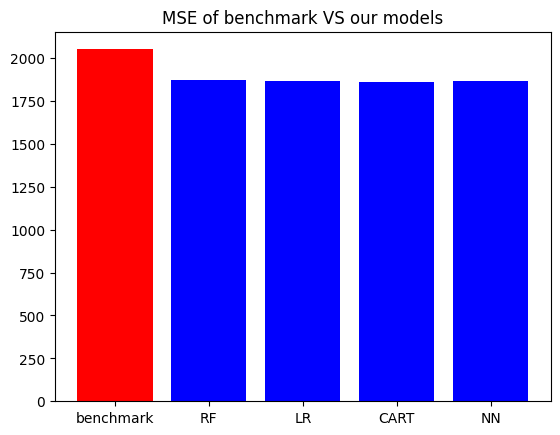

In [ ]:
plt.bar(Models, Values, color = ['red', 'blue', 'blue', 'blue', 'blue'])
plt.title("MSE of benchmark VS our models")

### Pred VS Actual

In [ ]:
lr_predictions = y_pred['LR']
cart_predictions = y_pred['CART']
rf_predictions = y_pred['RF']
print("lr_predictions " , len(lr_predictions))
print("y_test ", len(y_test))

lr_predictions  5382
y_test  5382


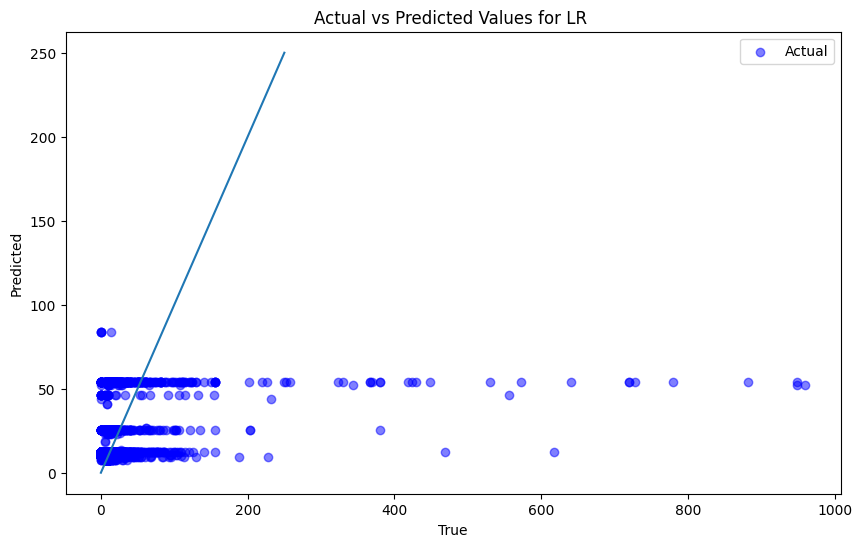

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_predictions, color='blue', label='Actual', alpha=0.5)
#plt.scatter(range(len(lr_predictions)), lr_predictions, color='red', label='Predicted', alpha=0.5)

# Adding labels and title
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values for LR ')
plt.legend()
x=[0,250]
y=[0,250]
plt.plot(x,y)
# Show the plot
plt.show()

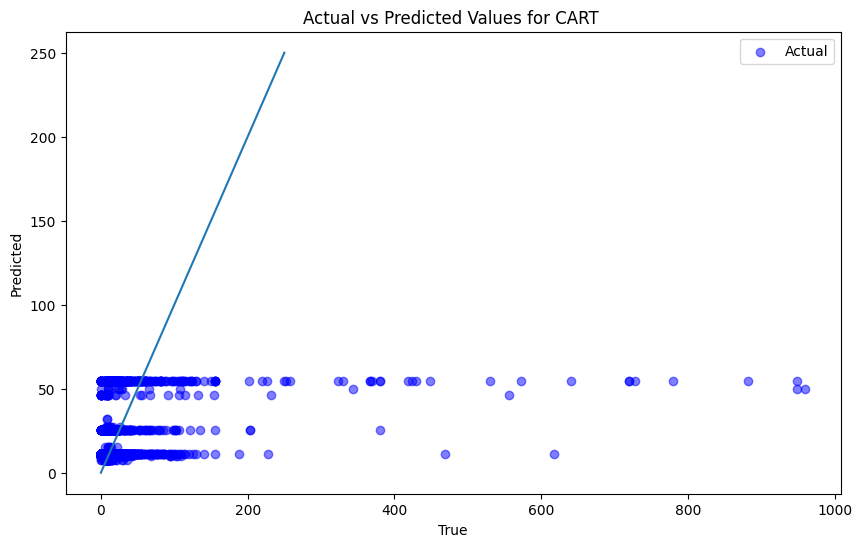

In [ ]:

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, cart_predictions, color='blue', label='Actual', alpha=0.5)
#plt.scatter(range(len(lr_predictions)), lr_predictions, color='red', label='Predicted', alpha=0.5)

# Adding labels and title
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values for CART ')
plt.legend()
x=[0,250]
y=[0,250]
plt.plot(x,y)
# Show the plot
plt.show()

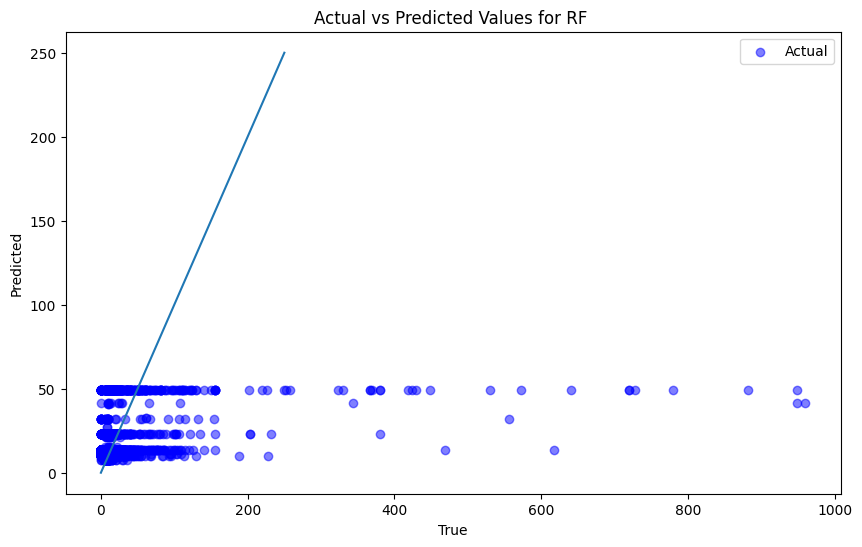

In [ ]:

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, color='blue', label='Actual', alpha=0.5)
#plt.scatter(range(len(lr_predictions)), lr_predictions, color='red', label='Predicted', alpha=0.5)

# Adding labels and title
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values for RF ')
plt.legend()
x=[0,250]
y=[0,250]
plt.plot(x,y)
# Show the plot
plt.show()

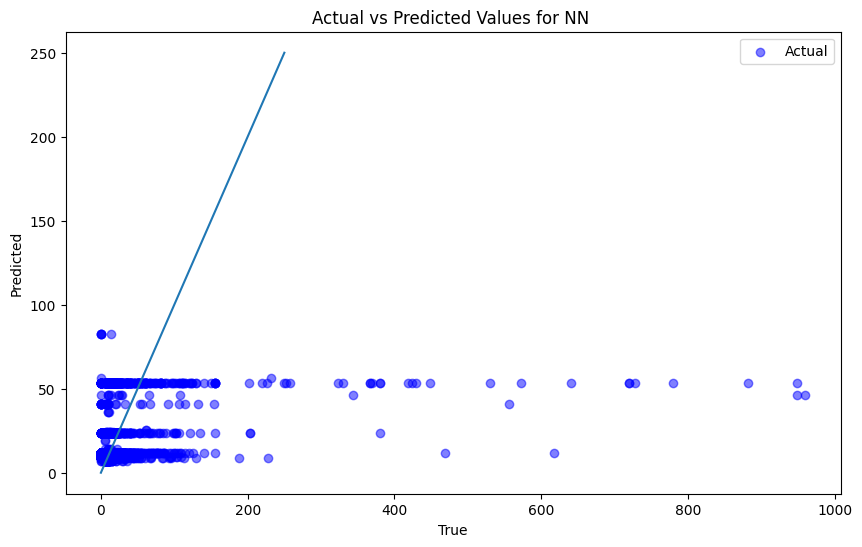

In [ ]:



# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, color='blue', label='Actual', alpha=0.5)
#plt.scatter(range(len(lr_predictions)), lr_predictions, color='red', label='Predicted', alpha=0.5)

# Adding labels and title
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values for NN ')
plt.legend()
x=[0,250]
y=[0,250]
plt.plot(x,y)
# Show the plot
plt.show()